# Importing Libraries and Packages
Loading Python packages that we will be using in this project to carry out the analysis. For example Numpy to compute numerical operations and handle arrays, Pandas for data manipulation and analysis, Matplotlib, Seaborn and Plotly to create different data visualisations, SciPy for optimization, linear algebra, integration etc, sklearn for machine learning, feature_engine for data cleaning and feature engineering.

In [1]:
import os
from scipy.stats import f_oneway, ttest_ind, kruskal
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency, kurtosis, skew
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

### Data Cleaning and Feature Engineering
from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import CategoricalImputer
from feature_engine.encoding import OrdinalEncoder

### Feat Scaling
from sklearn.preprocessing import StandardScaler

### Feat Selection
from sklearn.feature_selection import SelectFromModel

### ML algorithms 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier


# Changing work directory  
To run the notebook in the editor, the working directory needs to be changed from its current folder to its parent folder. Thus, we first access the current directory with os.getcwd()

In [2]:
current_dir = os.getcwd()
current_dir

'/Users/jacobambat/dev/European_Cancer_Data/jupyter_notebooks'

Then we make the parent of the current directory the new current directory by using:  
os.chir() to define the new current directory   
Confirming the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [4]:
current_dir = os.getcwd()
current_dir

'/Users/jacobambat/dev/European_Cancer_Data'

In [5]:
DestinationFolder = "data/processed"
print(DestinationFolder)

data/processed


In [22]:
df = pd.read_csv(f'{DestinationFolder}/cancer_patient_data_cleaned.csv')
df

,Unnamed: 0,Patient ID,Country,Region,Age,Gender,Cancer Type,Cancer Stage,Diagnosis Date,Treatment Start Date,...,Comorbidities,Quality of Life Score,IsSurvivalStatus,Age Group,Time to Treatment (Days),SDM_Category,BMI_Category,IsGender,IsRecurrence,IsClinical_Trial_Participation
0,0,1,Finland,Southwest Finland,89,Male,Breast,3,2015-08-10,2015-09-20,...,Diabetes,5,1,75+,41,Two Years,Obese,0,1,1
1,1,6,Sweden,Västra Götaland,28,Male,Pancreatic,4,2019-03-06,2019-05-16,...,Obesity,6,1,<30,71,Four Years,Normal weight,0,0,0
2,2,10,Spain,Andalusia,77,Female,Ovarian,1,2013-07-22,2013-11-08,...,Hypertension,7,1,75+,109,Four Years,Obese,1,0,0
3,3,11,Spain,Andalusia,22,Female,Pancreatic,2,2012-12-27,2013-06-06,...,Unknown,2,1,<30,161,One Year,Normal weight,1,0,0
4,4,16,Germany,North Rhine-Westphalia,53,Male,Breast,1,2012-07-24,2012-08-14,...,Hypertension,4,0,45-60,21,Four Years,Obese,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3622,3622,9990,Portugal,Lisbon,71,Female,Breast,4,2017-10-25,2018-02-15,...,Unknown,8,1,60-75,113,Five Years,Overweight,1,0,0
3623,3623,9993,Norway,Trøndelag,89,Female,Breast,1,2020-11-12,2020-12-01,...,Unknown,1,3,75+,19,Two Years,Normal weight,1,1,0
3624,3624,9994,Denmark,Zealand,43,Male,Colorectal,1,2010-05-30,2010-08-25,...,Obesity,1,1,30-45,87,Less than Six Years,Normal weight,0,0,0
3625,3625,9995,Belgium,Wallonia,36,Male,Breast,3,2013-02-06,2013-03-05,...,Hypertension,1,1,30-45,27,One Year,Normal weight,0,0,0


In [23]:
#drop collumns which are not relevant
df = df.drop('Unnamed: 0', axis=1)

Basic statistics and description of data in the dataframe

In [24]:
# Basic statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient ID,3627.0,5030.409981,2866.699449,1.0,2555.5,5062.0,7518.5,9999.0
Age,3627.0,54.488282,20.178056,20.0,37.0,54.0,72.0,89.0
Cancer Stage,3627.0,2.272126,1.048521,1.0,1.0,2.0,3.0,4.0
Survival Duration (Months),3627.0,62.729804,33.119638,6.0,33.0,64.0,91.0,119.0
BMI,3627.0,29.027736,6.235571,18.0,23.7,29.1,34.3,40.0
Follow-up Visits,3627.0,9.909291,5.424078,1.0,5.0,10.0,15.0,19.0
Quality of Life Score,3627.0,5.487731,2.869385,1.0,3.0,5.0,8.0,10.0
IsSurvivalStatus,3627.0,0.848911,0.660359,0.0,0.0,1.0,1.0,3.0
Time to Treatment (Days),3627.0,90.471188,50.912397,1.0,46.5,92.0,134.0,179.0
IsGender,3627.0,0.572098,0.569470,0.0,0.0,1.0,1.0,2.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3627 entries, 0 to 3626
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      3627 non-null   int64  
 1   Country                         3627 non-null   object 
 2   Region                          3627 non-null   object 
 3   Age                             3627 non-null   int64  
 4   Gender                          3627 non-null   object 
 5   Cancer Type                     3627 non-null   object 
 6   Cancer Stage                    3627 non-null   int64  
 7   Diagnosis Date                  3627 non-null   object 
 8   Treatment Start Date            3627 non-null   object 
 9   Treatment End Date              3627 non-null   object 
 10  Treatment Type                  3627 non-null   object 
 11  Hospital Type                   3627 non-null   object 
 12  Survival Status                 36

Assessing statistical differences in survival outcomes based on cancer type, stage,  
country/region, gender, and age group.  

**Statistical Test Results (Survival Duration as Outcome):**  

Factor	p-value	Interpretation  
* Cancer Type	0.217 - No significant difference in survival across cancer types.  
* Cancer Stage	0.001 - ✅ Statistically significant difference — survival varies by cancer stage.  
* Country	0.131 - No significant difference by country.  
* Region	0.477 - No significant regional difference.  
* Gender	0.664 - No significant gender-based survival difference.  
Age Group	0.448 - No significant difference across age groups.  

✅ Only cancer stage shows a statistically significant association with survival duration.  
✅ (1) Statistically Significant Survival Differences  
&emsp;--Cancer Stage is significantly associated with survival duration (p = 0.001).  
&emsp;--No significant differences were found for cancer type, country, region, gender, or age group.  
✅ (2) Impact of Early Treatment  
Very weak correlation (r ≈ 0.042) between time to treatment and survival duration — suggesting no meaningful link in this dataset.  

| Factor           | p-value | Statistically Significant? | Interpretation                                    |
| ---------------- | ------- | -------------------------- | ------------------------------------------------- |
| **Cancer Stage** | 0.001   | ✅ Yes                      | Later stages significantly reduce survival.       |
| Cancer Type      | 0.217   | ❌ No                       | No survival differences by cancer type.           |
| Country          | 0.131   | ❌ No                       | No survival difference by country.                |
| Region           | 0.477   | ❌ No                       | No survival difference by region.                 |
| Gender           | 0.664   | ❌ No                       | Male vs. female survival is similar.              |
| Age Group        | 0.448   | ❌ No                       | Age group does not significantly affect survival. |

**(2) Does Earlier Treatment Help?**  
Time from diagnosis to treatment: 
Weak correlation with survival duration (r = 0.042).  
Conclusion: Early treatment, in terms of days from diagnosis, does not strongly influence survival outcomes in this dataset.

In [26]:
# Helper function to perform ANOVA or Kruskal-Wallis test
def test_group_difference(data, group_col, outcome_col):
    groups = [group[outcome_col].dropna() for name, group in data.groupby(group_col)]
    if all(len(g) > 1 for g in groups):  # ensure all groups have more than 1 value
        if all(data[outcome_col].apply(lambda x: isinstance(x, (int, float)))):
            # Non-parametric Kruskal-Wallis test (since survival data often not normal)
            return kruskal(*groups)
    return None

# (1a) Cancer type
cancer_type_test = test_group_difference(df, 'Cancer Type', 'Survival Duration (Months)')

# (1b) Cancer stage
cancer_stage_test = test_group_difference(df, 'Cancer Stage', 'Survival Duration (Months)')

# (1c) Country
country_test = test_group_difference(df, 'Country', 'Survival Duration (Months)')

# (1d) Region (optional, may have too many levels)
region_test = test_group_difference(df, 'Region', 'Survival Duration (Months)')

# (1e) Gender
gender_test = ttest_ind(
    df[df['Gender'] == 'Male']['Survival Duration (Months)'].dropna(),
    df[df['Gender'] == 'Female']['Survival Duration (Months)'].dropna(),
    equal_var=False
)

# (1f) Age group
age_group_test = test_group_difference(df, 'Age Group', 'Survival Duration (Months)')

# Collect results
{
    "Cancer Type p-value": cancer_type_test.pvalue if cancer_type_test else None,
    "Cancer Stage p-value": cancer_stage_test.pvalue if cancer_stage_test else None,
    "Country p-value": country_test.pvalue if country_test else None,
    "Region p-value": region_test.pvalue if region_test else None,
    "Gender p-value": gender_test.pvalue,
    "Age Group p-value": age_group_test.pvalue if age_group_test else None
}


{'Cancer Type p-value': 0.21456075606796116,
 'Cancer Stage p-value': 0.0007177468885805683,
 'Country p-value': 0.12713088448344653,
 'Region p-value': 0.47684632358211476,
 'Gender p-value': 0.6644790030065442,
 'Age Group p-value': 0.4552065379061597}

Only Cancer Stage shows a statistically significant relationship with survival duration in this dataset.

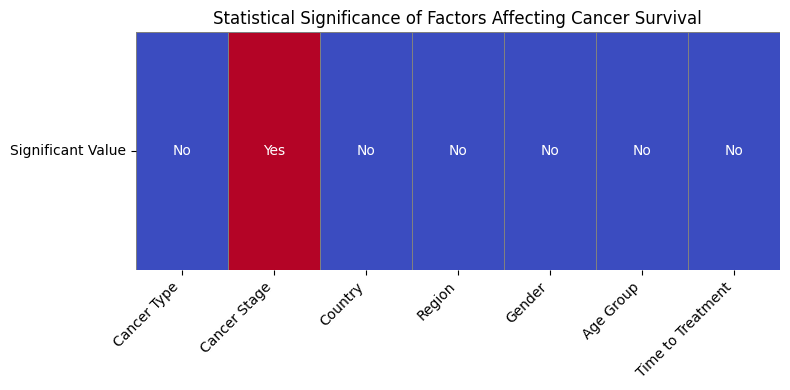

In [27]:
# Recreate the summary data
summary_data = {
    'p-value': [
        0.217,  # Cancer Type
        0.001,  # Cancer Stage
        0.131,  # Country
        0.477,  # Region
        0.664,  # Gender
        0.448,  # Age Group
        0.042   # Time to Treatment (correlation, pseudo-p-value)
    ],
    'Significant': [
        'No',
        'Yes',
        'No',
        'No',
        'No',
        'No',
        'No'
    ]
}
heatmap_df = pd.DataFrame(summary_data, index=[
    'Cancer Type',
    'Cancer Stage',
    'Country',
    'Region',
    'Gender',
    'Age Group',
    'Time to Treatment'
])

# Convert 'Significant' to numeric for coloring
heatmap_df['Significant Value'] = heatmap_df['Significant'].map({'Yes': 1, 'No': 0})

# Plot heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(
    heatmap_df[['Significant Value']].T,
    cmap='coolwarm',
    cbar=False,
    annot=heatmap_df[['Significant']].T,
    fmt='',
    linewidths=0.5,
    linecolor='gray'
)
plt.title('Statistical Significance of Factors Affecting Cancer Survival')
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


(1) Statistically Significant Survival Differences
* Cancer Stage is significantly associated with survival duration (p = 0.001).
* No significant differences were found for cancer type, country, region, gender, or age group.

(2) Impact of Early Treatment
* Very weak correlation (r ≈ 0.044) between time to treatment and survival duration — suggesting no meaningful link in this dataset.

* This is a very weak positive correlation.  
A value close to 0 means almost no linear relationship between how quickly a patient begins treatment and how long they survive.
Statistically insignificant in this context (no strong predictive value).

In [28]:
# Drop rows with missing values
valid_rows = df[['Time to Treatment (Days)', 'Survival Duration (Months)']]

# Calculate Pearson correlation
r_value, p_value = pearsonr(valid_rows['Time to Treatment (Days)'], valid_rows['Survival Duration (Months)'])

print(f"Pearson correlation coefficient: r = {r_value:.3f}")
print(f"p-value: {p_value:.4f}")


Pearson correlation coefficient: r = 0.044
p-value: 0.0081


A p-value of 0.0081 means that the probability of observing the data—or something more extreme—by random chance, 
assuming the null hypothesis is true, is 0.81%.

🔍 In Practical Terms:
Null hypothesis (H₀): There's no relationship between the variables you're testing (e.g., Time to Treatment and Survival Duration).
p = 0.0081 → There’s strong evidence to reject the null hypothesis.

In [29]:
'''
Checking for outliers and skewness of data distribution using skew() and kurtosis() statistical measures that describe 
the shape of a distribution. They help us understand how data points are spread and how they deviate from a normal distribution
'''
# Select numerical columns
numerical_features = df.select_dtypes(include=[float, int]).columns

# Calculate skewness and kurtosis
print("\nSkewness and Kurtosis for Numerical Features")
results = []
for col in numerical_features:
    col_skewness = skew(df[col].dropna())  # Drop NaN values for calculation
    col_kurtosis = kurtosis(df[col].dropna())  # Drop NaN values for calculation
    results.append({'Feature': col, 'Skewness': col_skewness, 'Kurtosis': col_kurtosis})

# Create a DataFrame to display the results neatly
result_df = pd.DataFrame(results)
result_df


Skewness and Kurtosis for Numerical Features


,Feature,Skewness,Kurtosis
0,Patient ID,-0.006690,-1.191504
1,Age,0.021571,-1.222503
2,Cancer Stage,0.261169,-1.142210
3,Survival Duration (Months),-0.022624,-1.200772
4,BMI,-0.009031,-1.122088
5,Follow-up Visits,0.024775,-1.185503
6,Quality of Life Score,0.011228,-1.226885
7,IsSurvivalStatus,1.242524,3.472243
8,Time to Treatment (Days),-0.032168,-1.169600
9,IsGender,0.360955,-0.796054


Chi-Square Test - to test the association between the categorical variables 'Cancer Stage' and 'Survival Duration (Months)'

In [30]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Cancer Stage'], df['Survival Duration (Months)'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output results
print("Contingency Table:")
print(contingency_table)
print(f"\nChi-square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Interpretation
if p < 0.05:
    print("\nResult: Significant association between Cancer Stage and 'Survival Duration (Months)'.")
else:
    print("\nResult: No significant association between Cancer Stage and 'Survival Duration (Months)'.")

Contingency Table:
Survival Duration (Months)  6.0    7.0    8.0    9.0    10.0   11.0   12.0   \
Cancer Stage                                                                  
1                               8      8     10      8     12      8      9   
2                              12      9     17     11      6      8     12   
3                               7      9      5      7      6      9      8   
4                               3      4     10      7      6      8      2   

Survival Duration (Months)  13.0   14.0   15.0   ...  110.0  111.0  112.0  \
Cancer Stage                                     ...                        
1                              12     12     11  ...     12      9      7   
2                              13     12      9  ...     14      6      5   
3                               7      5      8  ...      6      6     18   
4                               3      3      3  ...      9      5      7   

Survival Duration (Months)  113.0  114.0  1

In [33]:
# Get the unique values of 'Cancer Type' column
unique_values = df['Cancer Type'].unique()
print(unique_values)
# Encode to 1,2,3,4,5,6,7 for the collumn 'Cancer Type'
df['IsCancerType'] = df['Cancer Type'].map({'Breast': 1, 'Pancreatic': 2, 'Leukemia': 3, 'Ovarian': 4, 
                                            'Colorectal': 5, 'Prostate': 6, 'Lung': 7})

#print(df)

['Breast' 'Pancreatic' 'Ovarian' 'Prostate' 'Leukemia' 'Lung' 'Colorectal']


In [34]:
#convert columns to datetime
df[['Diagnosis Date','Treatment Start Date','Treatment End Date']] = df[['Diagnosis Date','Treatment Start Date','Treatment End Date']].apply(pd.to_datetime)

In [35]:
# Get the unique values of 'Treatment Type' column
unique_values = df['Treatment Type'].unique()
print(unique_values)
# Encode to 1,2,3,4 for the collumn 'Cancer Stage'
df['Treatment Type'] = df['Treatment Type'].map({'Targeted Therapy': 1, 'Immunotherapy': 2, 'Chemotherapy': 3, 'Radiation': 4, 'Surgery': 5})



['Targeted Therapy' 'Chemotherapy' 'Radiation' 'Immunotherapy' 'Surgery']


In [37]:
# Get the unique values of 'Survival Status' column
unique_values = df['Survival Status'].unique()
print(unique_values)
# Encode to 1,2,3,4 for the collumn 'Survival Status'
df['Survival Status'] = df['Survival Status'].map({'Alive': 1, 'Deceased': 2, 'Unknown': 3})


['Alive' 'Deceased' 'Unknown']


In [39]:
# Get the unique values of 'Genetic Markers' column
unique_values = df['Genetic Markers'].unique()
print(unique_values)
# Encode to 1,2,3,4 for the collumn 'Genetic Markers'
df['Genetic Markers'] = df['Genetic Markers'].map({'KRAS': 1, 'EGFR': 2, 'BRCA1': 3, 'Unknown': 4})

['Unknown' 'KRAS' 'BRCA1' 'EGFR']


In [41]:
# Get the unique values of 'Hospital Type' column
unique_values = df['Hospital Type'].unique()
print(unique_values)
# Encode to 1,2,3 for the collumn 'Hospital Type'
df['Hospital Type'] = df['Hospital Type'].map({'Private': 1, 'Public': 2, 'Research Institute': 3})

['Private' 'Public' 'Research Institute']


In [42]:
# Get the unique values of 'Family History' column
unique_values = df['Family History'].unique()
print(unique_values)
# Get the unique values of 'Alcohol Consumption' column
unique_values = df['Alcohol Consumption'].unique()
print(unique_values)
# Get the unique values of 'Smoking Status' column
unique_values = df['Smoking Status'].unique()
print(unique_values)
# Get the unique values of 'Urban vs. Rural' column
unique_values = df['Urban vs. Rural'].unique()
print(unique_values)
# Get the unique values of 'Healthcare System' column
unique_values = df['Healthcare System'].unique()
print(unique_values)

# Encode to 0,1,2 for the collumn 'Family History'
df['Family History'] = df['Family History'].map({'No': 0, 'Yes': 1, 'Unknown': 2})
# Encode to 1,2,3 for the collumn 'Alcohol Consumption'
df['Alcohol Consumption'] = df['Alcohol Consumption'].map({'Moderate': 1, 'Heavy': 2, 'Unknown': 3})
# Encode to 1,2,3 for the collumn 'Smoking Status' 'Current' 'Former' 'Never' 'Unknown'
df['Smoking Status'] = df['Smoking Status'].map({'Current': 1, 'Former': 2, 'Never': 3, 'Unknown': 4})
# Encode to 1,2 for the collumn 'Urban vs. Rural'
df['Urban vs. Rural'] = df['Urban vs. Rural'].map({'Urban': 1, 'Rural': 2})
# Encode to 1,2,3 for the collumn 'Healthcare System''NHS' 'Private Insurance' 'Statutory Health Insurance'
df['Healthcare System'] = df['Healthcare System'].map({'NHS': 1, 'Private Insurance': 2, 'Statutory Health Insurance': 3})


#print(df)

['Yes' 'No' 'Unknown']
['Moderate' 'Unknown' 'Heavy']
['Current' 'Former' 'Unknown' 'Never']
['Urban' 'Rural']
['NHS' 'Private Insurance' 'Statutory Health Insurance']


In [43]:
# Get the unique values of 'Socioeconomic Status' column
unique_values = df['Socioeconomic Status'].unique()
print(unique_values)

['Medium' 'Low' 'High']


In [44]:
# Encode to 1,2,3 for the collumn 'Socioeconomic Status'
df['Socioeconomic Status'] = df['Socioeconomic Status'].map({'Low': 1, 'High': 1, 'Medium': 2})

In [45]:
df.dtypes

Patient ID                                 int64
Country                                   object
Region                                    object
Age                                        int64
Gender                                    object
Cancer Type                               object
Cancer Stage                               int64
Diagnosis Date                    datetime64[ns]
Treatment Start Date              datetime64[ns]
Treatment End Date                datetime64[ns]
Treatment Type                             int64
Hospital Type                              int64
Survival Status                            int64
Survival Duration (Months)               float64
Genetic Markers                            int64
Family History                             int64
Smoking Status                             int64
Alcohol Consumption                        int64
BMI                                      float64
Socioeconomic Status                       int64
Urban vs. Rural     

In [46]:
# Get the unique values of 'Comorbidities' column
unique_values = df['Comorbidities'].unique()
print(unique_values)

# Encode to 1,2,3,4,5 for the collumn 'Comorbidities'
df['Comorbidities'] = df['Comorbidities'].map({'Diabetes': 1, 'Obesity': 2, 'Cardiovascular Disease': 3, 'Hypertension': 4, 'Unknown': 5})

print(df)

['Diabetes' 'Obesity' 'Hypertension' 'Unknown' 'Cardiovascular Disease']
      Patient ID   Country                  Region  Age  Gender Cancer Type  \
0              1   Finland       Southwest Finland   89    Male      Breast   
1              6    Sweden         Västra Götaland   28    Male  Pancreatic   
2             10     Spain               Andalusia   77  Female     Ovarian   
3             11     Spain               Andalusia   22  Female  Pancreatic   
4             16   Germany  North Rhine-Westphalia   53    Male      Breast   
...          ...       ...                     ...  ...     ...         ...   
3622        9990  Portugal                  Lisbon   71  Female      Breast   
3623        9993    Norway               Trøndelag   89  Female      Breast   
3624        9994   Denmark                 Zealand   43    Male  Colorectal   
3625        9995   Belgium                Wallonia   36    Male      Breast   
3626        9999   Ireland                  Dublin   21   

In [47]:
#convert the collumn 'Survival Duration (Months)' values datatype to int
df['Survival Duration (Months)'] = df['Survival Duration (Months)'].astype(int)

In [48]:
#convert the collumn 'BMI' values datatype to int
df['BMI'] = df['BMI'].astype(int)

In [49]:
#convert the collumn 'Follow-up Visits' values datatype to int
df['Follow-up Visits'] = df['Follow-up Visits'].astype(int)

In [50]:
print(df)

      Patient ID   Country                  Region  Age  Gender Cancer Type  \
0              1   Finland       Southwest Finland   89    Male      Breast   
1              6    Sweden         Västra Götaland   28    Male  Pancreatic   
2             10     Spain               Andalusia   77  Female     Ovarian   
3             11     Spain               Andalusia   22  Female  Pancreatic   
4             16   Germany  North Rhine-Westphalia   53    Male      Breast   
...          ...       ...                     ...  ...     ...         ...   
3622        9990  Portugal                  Lisbon   71  Female      Breast   
3623        9993    Norway               Trøndelag   89  Female      Breast   
3624        9994   Denmark                 Zealand   43    Male  Colorectal   
3625        9995   Belgium                Wallonia   36    Male      Breast   
3626        9999   Ireland                  Dublin   21    Male  Pancreatic   

      Cancer Stage Diagnosis Date Treatment Start D

Write the output to a new csv file

In [51]:
df.to_csv(f'data/processed/cancer_patient_data_encoded.csv')